# Titanic Kaggle Project

In [1]:
# importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [2]:
# reading data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
display(train_data.head(), train_data.shape, test_data.head(), test_data.shape)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 12)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


(418, 11)

In [3]:
# copying data to another variable
df_train = train_data.copy()
df_test = test_data.copy()

In [4]:
# checking info of the train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# checking info the test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**observations**
- There are 5 object type columns (Name, Sex, Ticket, Cabin and Embarked)
- There are 3 columns with null values (Age, Cabin and Embarked)

### Removing useless columns
- PasengerId and Name won't contribute for predictive performace of the models, so i'll just drop them entirely

In [6]:
def useless_drop(df):
    """drops both PassengerId and Name columns from the dataframe"""
    df.drop(['PassengerId'], axis=1, inplace=True)
    df.drop(['Name'], axis=1, inplace=True)

In [7]:
useless_drop(df_train)
useless_drop(df_test)
display(df_train.head(), df_test.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,3,female,47.0,1,0,363272,7.0000,NaN,S
2,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,3,male,27.0,0,0,315154,8.6625,NaN,S
4,3,female,22.0,1,1,3101298,12.2875,NaN,S


### Exploring null values

In [8]:
# number of null values for each column
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
# percentage of null values in each column
df_train.isnull().sum()*100/len(df_train)

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

**observations:**
- The 'Age' column has ~20% of missing values
- The 'Cabin' column has ~80% of missing values (way to high)
- the 'Embarked' column has ~0.2% of missing values

### What to do with each of these columns?
**For the Age column**
- I can just fill the null values with the median age
-------
**For the Cabin column**
- Since the majority of values in the column are null, I'll just drop the entire column
--------
**For the Embarked column**
- I can just replace the null values by the mode of the column

In [10]:
# function to replace the null values
def null_filler(dataframe):
    dataframe['Age'] = dataframe['Age'].fillna(df_train['Age'].median())
    dataframe = dataframe.drop(['Cabin'], axis=1)
    dataframe['Embarked'] = dataframe['Embarked'].fillna(df_train['Embarked'].mode().loc[0])
    for column in dataframe.columns:
        if dataframe[column].isnull().sum() > 0:
            dataframe[column] = dataframe[column].fillna(df_train[column].mode().loc[0])
    return dataframe

In [11]:
# dealing with null values from df_train
df_train = null_filler(df_train)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [12]:
# dealing with null values from df_test
df_test = null_filler(df_test)
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

**Null values have been dealt with**
## Exploratory Data Analysis (EDA)

In [21]:
num_var = df_train.select_dtypes(['float64', 'int64']).columns.tolist()
print(f'Numerical variables: {num_var}')
cat_var = df_train.select_dtypes(['object']).columns.tolist()
print(f'Categorical variables: {cat_var}')

Numerical variables: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical variables: ['Sex', 'Ticket', 'Embarked']


### Univariate Analysis
#### Numerical Variables

**Survived**

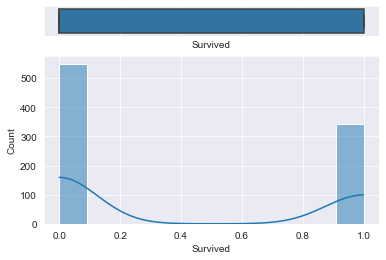

In [23]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios':(.15, .85)})
sns.boxplot(x='Survived', data=df_train, ax=ax_box)
sns.histplot(x='Survived', kde=True, data=df_train, ax=ax_hist)
plt.show()

**Pclass**

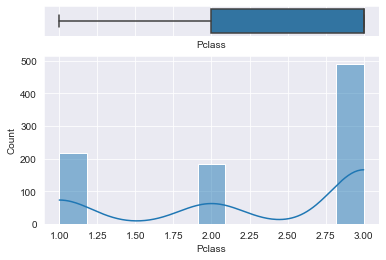

In [24]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios':(.15, .85)})
sns.boxplot(x='Pclass', data=df_train, ax=ax_box)
sns.histplot(x='Pclass', kde=True, data=df_train, ax=ax_hist)
plt.show()

**Age**

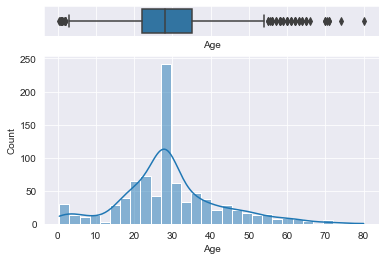

In [25]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios':(.15, .85)})
sns.boxplot(x='Age', data=df_train, ax=ax_box)
sns.histplot(x='Age', kde=True, data=df_train, ax=ax_hist)
plt.show()

**SibSp**

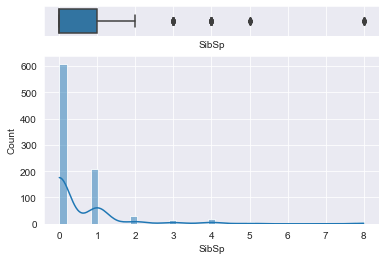

In [26]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios':(.15, .85)})
sns.boxplot(x='SibSp', data=df_train, ax=ax_box)
sns.histplot(x='SibSp', kde=True, data=df_train, ax=ax_hist)
plt.show()

**Parch**

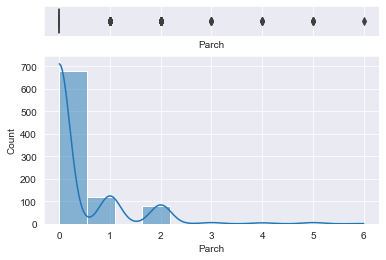

In [27]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios':(.15, .85)})
sns.boxplot(x='Parch', data=df_train, ax=ax_box)
sns.histplot(x='Parch', kde=True, data=df_train, ax=ax_hist)
plt.show()

**Fare**

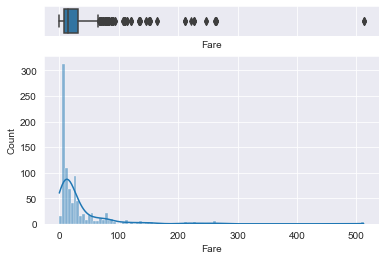

In [28]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios':(.15, .85)})
sns.boxplot(x='Fare', data=df_train, ax=ax_box)
sns.histplot(x='Fare', kde=True, data=df_train, ax=ax_hist)
plt.show()